# Shape classifier
This notebook contains the code used to train the traffic sign shape classifier

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# classes
CATEGORIES = ["diamond", "hex", "round", "square", "triangle"]

#load data
pickle_in = open("Pickle-data/Shape/features-shape.pickle", "rb")
features = pickle.load(pickle_in)

pickle_in = open("Pickle-data/Shape/labels-shape.pickle", "rb")
labels = pickle.load(pickle_in)

In [4]:
#normalization
features = features/255.0

Features shape:  (3699, 28, 28, 1)
Labels shape:  (3699,)


In [2]:
#train val test split
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.9)

features_val, features_test, labels_val, labels_test = train_test_split(features_test, labels_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

NameError: name 'features' is not defined

### Data exploration

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_labels = list(map(lambda sign_num : CATEGORIES[sign_num], y))
y_df = pd.DataFrame(y_labels, dtype=str, columns=['CATEGORIES'])
   

print('Categories|Counts')
print(y_df['CATEGORIES'].value_counts())


### Visualise some images

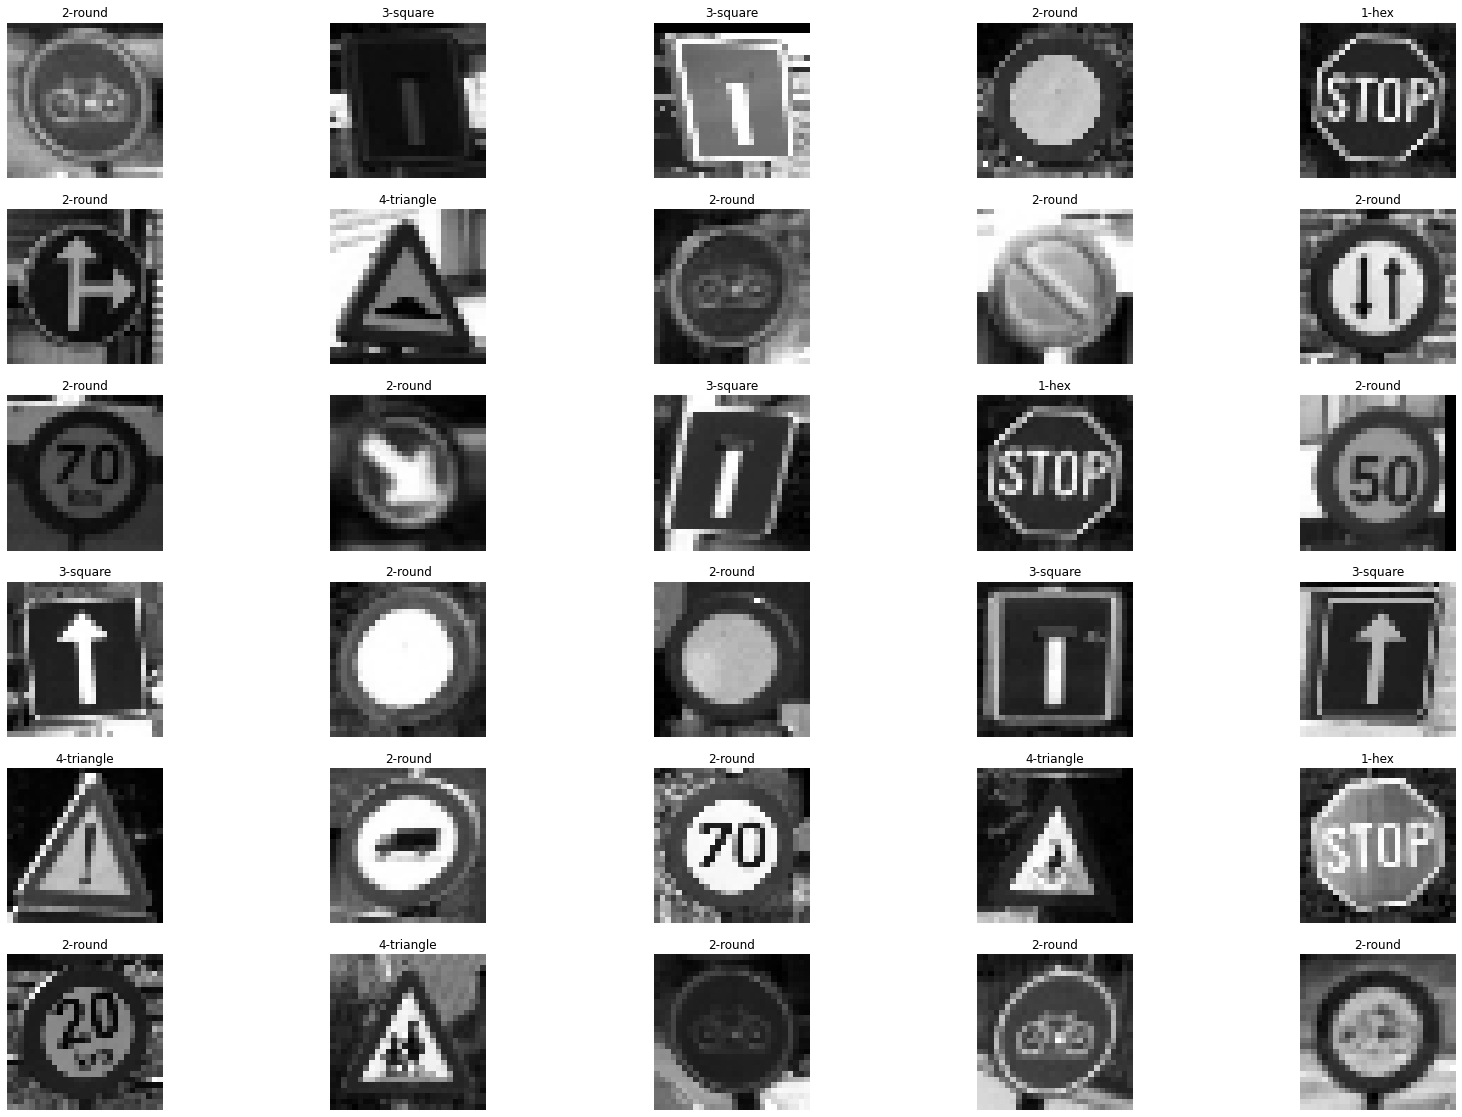

In [11]:
import random
import matplotlib.image
row, col = [6, 5]
fig, axes = plt.subplots(row_show, col_show, figsize=(28,20))
axes = axes.ravel()

for i in range(row_show * col_show):
    features_train1 = np.squeeze(features_train)
    index = random.randint(0, len(features_train1))
    image = features_train1[index]
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(str(labels_train[index]) + CATEGORIES[labels_train[index]])

### Building the covnet

In [12]:
#import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, InputLayer

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [13]:
# Initialising the CNN
model = Sequential()

#input layers
model.add(InputLayer(input_shape = (28,28,1)))
model.add(Conv2D(30, (5, 5), activation = 'relu'))

#pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#repeat
classifier.add(Conv2D(50, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(5, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________

## Fitting the model to train the classifier

In [14]:
history = model.fit(features_train, labels_train,batch_size=64, epochs=15, validation_data=(features_val, labels_val))
model.save("shape-classifier.keras")

Train on 2774 samples, validate on 555 samples
Epoch 1/15
2774/2774 [==============================] - 1s 461us/sample - loss: 1.2689 - acc: 0.5573 - val_loss: 0.7233 - val_acc: 0.7459
Epoch 2/15
2774/2774 [==============================] - 1s 436us/sample - loss: 0.4948 - acc: 0.8623 - val_loss: 0.3186 - val_acc: 0.9171
Epoch 3/15
2774/2774 [==============================] - 1s 446us/sample - loss: 0.2122 - acc: 0.9380 - val_loss: 0.1596 - val_acc: 0.9532
Epoch 4/15
2774/2774 [==============================] - 1s 439us/sample - loss: 0.1139 - acc: 0.9668 - val_loss: 0.0695 - val_acc: 0.9838
Epoch 5/15
2774/2774 [==============================] - 1s 436us/sample - loss: 0.0733 - acc: 0.9831 - val_loss: 0.0532 - val_acc: 0.9892
Epoch 6/15
2774/2774 [==============================] - 1s 441us/sample - loss: 0.0497 - acc: 0.9870 - val_loss: 0.0594 - val_acc: 0.9820
Epoch 7/15
2774/2774 [==============================] - 1s 455us/sample - loss: 0.0390 - acc: 0.9899 - val_loss: 0.0342 - val

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4

### Visualize training history

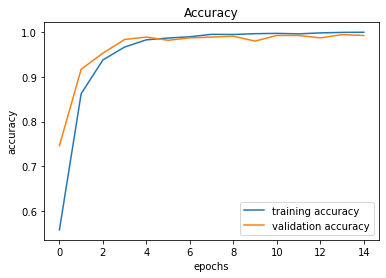

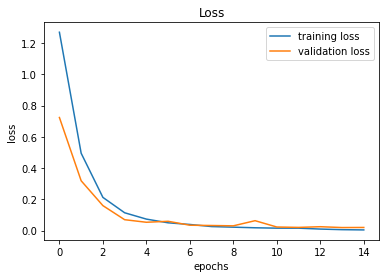

In [16]:
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Prediction accuracy

In [17]:
from sklearn.metrics import accuracy_score

pred = classifier.predict_classes(features_test)
print(accuracy_score(labels_test, pred))

0.981081081081081


In [18]:
# Look at accuracy on test dataset by class label
import itertools
import numpy as np
from sklearn.metrics import classification_report


print(classification_report(labels_test, pred))


------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       1.00      1.00      1.00         4
           2       0.98      0.99      0.98       180
           3       0.97      1.00      0.99        74
           4       0.99      0.96      0.98        82

    accuracy                           0.98       370
   macro avg       0.99      0.98      0.98       370
weighted avg       0.98      0.98      0.98       370

------------------------------------------------------
